<a href="https://colab.research.google.com/github/Suyogpawar03/Machine-learning-/blob/main/model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Food_Delivery_Time_Prediction.csv to Food_Delivery_Time_Prediction.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
from sklearn.cluster import AgglomerativeClustering
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






In [ ]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [ ]:
print(df.isnull().sum())

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [ ]:
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Vehicle_Type']

# One-hot encode and update the main DataFrame
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Order_Priority_Low,Order_Priority_Medium,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,Afternoon,4.1,3.0,26.22,1321.10,81.54,True,False,False,False,True,False,True,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,Night,4.5,4.2,62.61,152.21,29.02,False,False,False,False,True,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,Night,3.3,3.4,48.43,1644.38,64.17,False,True,False,False,True,False,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,Evening,3.2,3.7,111.63,541.25,79.23,False,False,False,True,False,False,True,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,Night,3.5,2.8,32.38,619.81,2.34,True,False,False,False,False,True,False,True,False


In [ ]:
cols_to_scale = ['Distance', 'Delivery_Time']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Order_Priority_Low,Order_Priority_Medium,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,4,Afternoon,4.1,3.0,0.105228,1321.10,81.54,True,False,False,False,True,False,True,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,8,Night,4.5,4.2,0.453658,152.21,29.02,False,False,False,False,True,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,9,Night,3.3,3.4,0.317886,1644.38,64.17,False,True,False,False,True,False,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,2,Evening,3.2,3.7,0.923018,541.25,79.23,False,False,False,True,False,False,True,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,6,Night,3.5,2.8,0.164209,619.81,2.34,True,False,False,False,False,True,False,True,False


## feature engineering


In [ ]:
from math import radians , sin ,cos , asin , sqrt

def haversine(lon1, lat1, lon2 , lat2):


    lon1,lat1, lon2 , lat2 = map(radians , [ lon1,lat1, lon2 , lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

In [ ]:
df['Customer_Location'] = df['Customer_Location'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['Restaurant_Location'] = df['Restaurant_Location'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [ ]:
df['Customer_Lat'] = df['Customer_Location'].apply(lambda x: x[0])
df['Customer_Lon'] = df['Customer_Location'].apply(lambda x: x[1])
df['Restaurant_Lat'] = df['Restaurant_Location'].apply(lambda x: x[0])
df['Restaurant_Lon'] = df['Restaurant_Location'].apply(lambda x: x[1])

# Calculate distance using haversine
df['Calculated_Distance'] = df.apply(lambda row: haversine(
    row['Restaurant_Lon'], row['Restaurant_Lat'],
    row['Customer_Lon'], row['Customer_Lat']), axis=1)

In [ ]:
df['Distance_Diff'] = abs(df['Distance'] - df['Calculated_Distance'])
print(df[['Distance', 'Calculated_Distance', 'Distance_Diff']])

     Distance  Calculated_Distance  Distance_Diff
0    0.043068           775.651198     775.608130
1    0.853158          1042.385597    1041.532438
2    0.263741           476.220706     475.956965
3    0.544299           389.912629     389.368330
4    0.254307           806.505886     806.251580
..        ...                  ...            ...
195  0.955701           670.130652     669.174951
196  0.228466           558.891202     558.662736
197  0.824036           106.686689     105.862653
198  0.965546           880.580093     879.614547
199  0.355209           763.581776     763.226566

[200 rows x 3 columns]


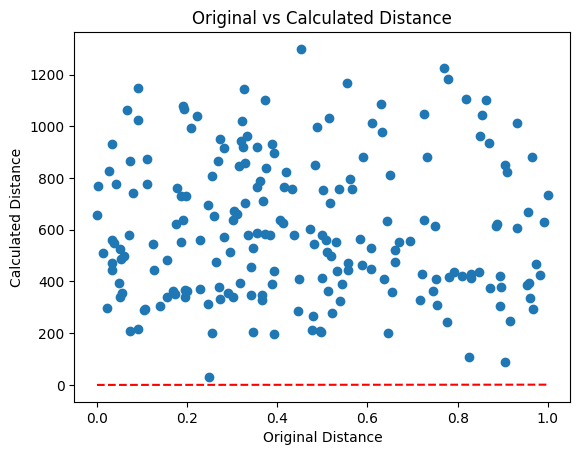

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Distance'], df['Calculated_Distance'])
plt.xlabel('Original Distance')
plt.ylabel('Calculated Distance')
plt.title('Original vs Calculated Distance')
plt.plot([0, max(df['Distance'])], [0, max(df['Distance'])], color='red', linestyle='--')
plt.show()

In [ ]:
time_mapping = {
    'Afternoon': 14,
    'Evening': 19,
    'Night': 22
}

# Apply the mapping
df['Order_Time_Hour'] = df['Order_Time'].map(time_mapping)
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,...,Order_Priority_Medium,Vehicle_Type_Bike,Vehicle_Type_Car,Customer_Lat,Customer_Lon,Restaurant_Lat,Restaurant_Lon,Calculated_Distance,Distance_Diff,Order_Time_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,4,Afternoon,4.1,3.0,0.105228,1321.10,...,True,False,True,17.030479,79.743077,12.358515,85.100083,775.651198,775.608130,14.0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,8,Night,4.5,4.2,0.453658,152.21,...,False,False,True,15.398319,86.639122,14.174874,77.025606,1042.385597,1041.532438,22.0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,9,Night,3.3,3.4,0.317886,1644.38,...,False,True,False,15.687342,83.888808,19.594748,82.048482,476.220706,475.956965,22.0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,2,Evening,3.2,3.7,0.923018,541.25,...,True,True,False,20.415599,78.046984,16.915906,78.278698,389.912629,389.368330,19.0
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,6,Night,3.5,2.8,0.164209,619.81,...,False,True,False,14.786904,78.706532,15.206038,86.203182,806.505886,806.251580,22.0


In [ ]:
def is_rush_hour(hour):
    return 1 if (7 <= hour <= 10) or (17 <= hour <= 20) else 0

df['Rush_Hour'] = df['Order_Time_Hour'].apply(is_rush_hour)

In [ ]:
print(df[['Order_Time', 'Order_Time_Hour', 'Rush_Hour']].head())

  Order_Time  Order_Time_Hour  Rush_Hour
0  Afternoon             14.0          0
1      Night             22.0          0
2      Night             22.0          0
3    Evening             19.0          1
4      Night             22.0          0


In [ ]:
print(df.dtypes)

Order_ID                       object
Customer_Location              object
Restaurant_Location            object
Distance                      float64
Delivery_Person_Experience      int64
Order_Time                     object
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
Weather_Conditions_Rainy         bool
Weather_Conditions_Snowy         bool
Weather_Conditions_Sunny         bool
Traffic_Conditions_Low           bool
Traffic_Conditions_Medium        bool
Order_Priority_Low               bool
Order_Priority_Medium            bool
Vehicle_Type_Bike                bool
Vehicle_Type_Car                 bool
Customer_Lat                  float64
Customer_Lon                  float64
Restaurant_Lat                float64
Restaurant_Lon                float64
Calculated_Distance           float64
Distance_Diff                 float64
Order_Time_H

In [ ]:
df_model = df.drop(columns=[
    "Order_ID", "Customer_Location", "Restaurant_Location", "Order_Time"
])

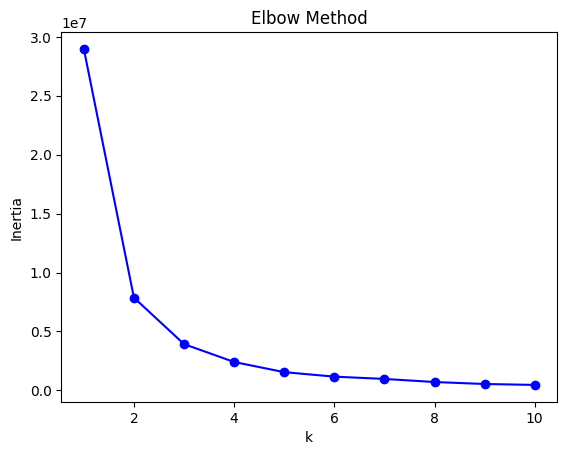

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
clustering_features = df_model[[
    'Calculated_Distance', 'Delivery_Time', 'Distance_Diff',
    'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
    'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
    'Order_Priority_Low', 'Order_Priority_Medium', 'Rush_Hour'
]]

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
df_model['KMeans_Cluster'] = kmeans.fit_predict(clustering_features)

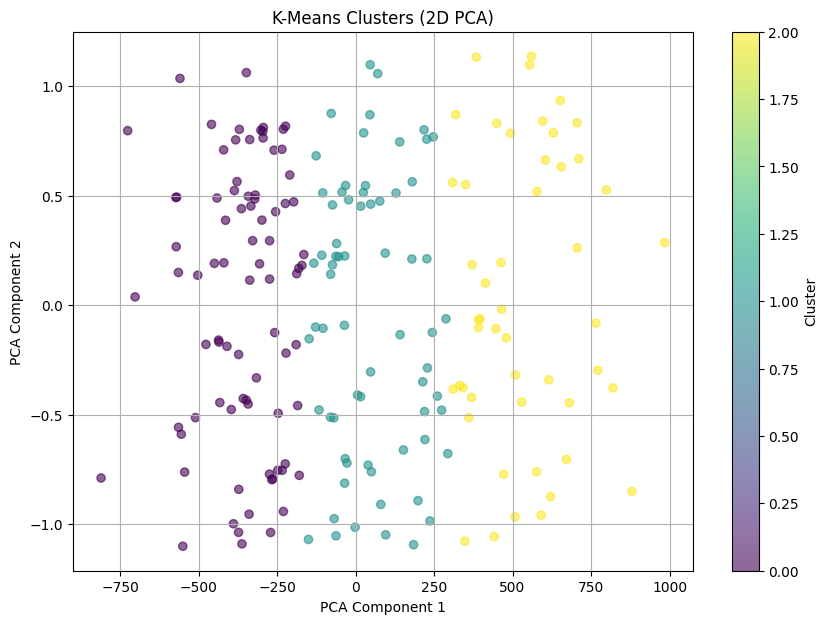

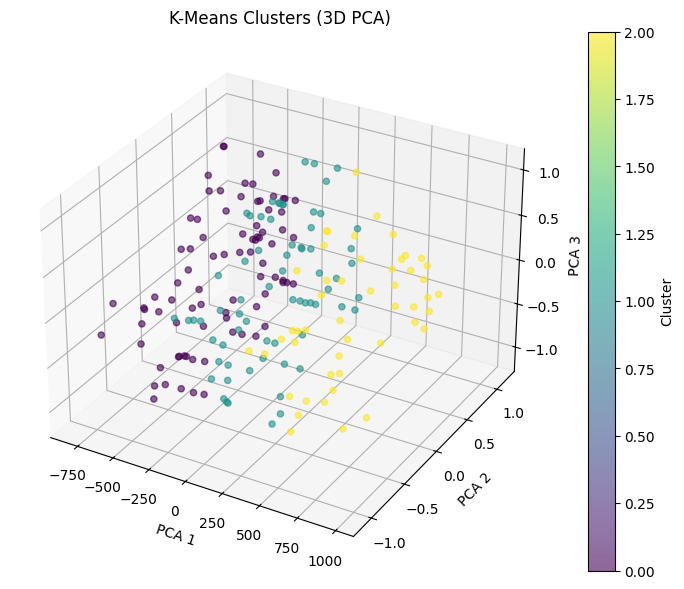

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(clustering_features)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(components[:, 0], components[:, 1], c=df_model['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(clustering_features)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2],
                c=df_model['KMeans_Cluster'], cmap='viridis', alpha=0.6)

ax.set_title('K-Means Clusters (3D PCA)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(sc, label='Cluster')
plt.show()


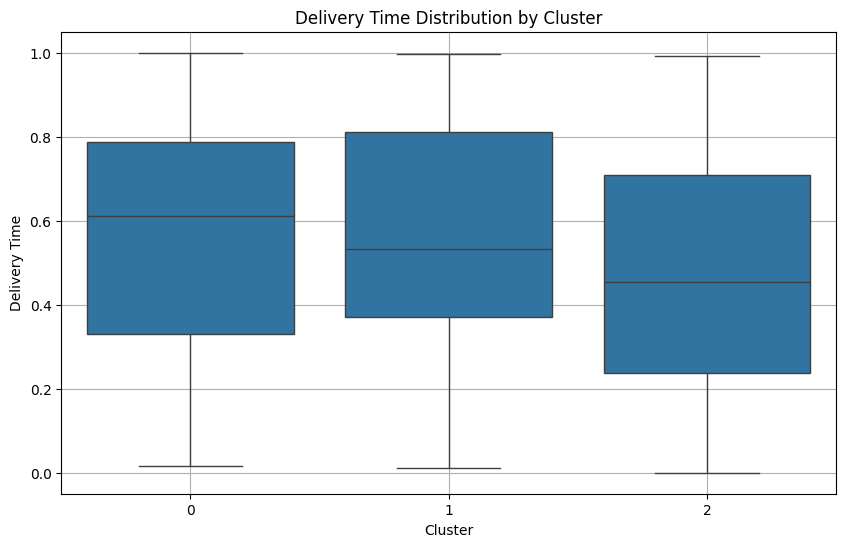

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster', y='Delivery_Time', data=df_model)
plt.title('Delivery Time Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Delivery Time')
plt.grid(True)
plt.show()


In [ ]:
cluster_stats = df_model.groupby('KMeans_Cluster')['Delivery_Time'].describe()
print(cluster_stats)


                count      mean       std       min       25%       50%  \
KMeans_Cluster                                                            
0                83.0  0.549524  0.278724  0.016756  0.331386  0.611452   
1                68.0  0.545261  0.289474  0.011969  0.371409  0.532459   
2                49.0  0.472301  0.290104  0.000000  0.237648  0.453658   

                     75%       max  
KMeans_Cluster                      
0               0.786672  1.000000  
1               0.811136  0.997989  
2               0.708349  0.991670  


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_model['Hierarchical_Cluster'] = agglo.fit_predict(clustering_features)

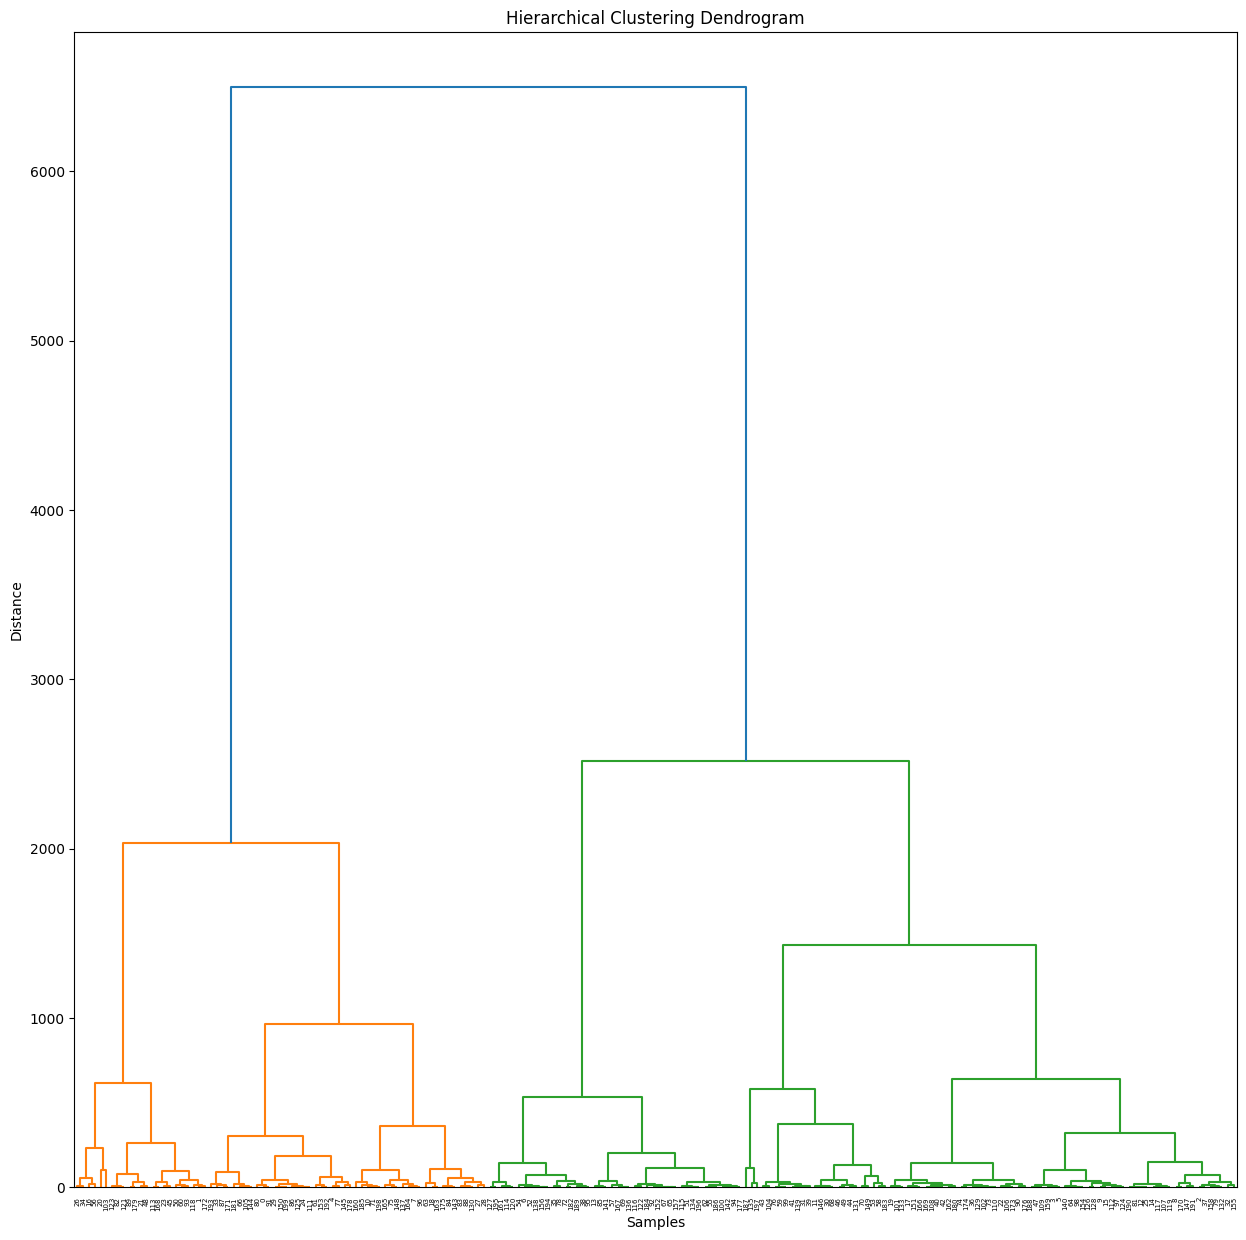

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

linked = linkage(clustering_features, method='ward')

plt.figure(figsize=(15, 15))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

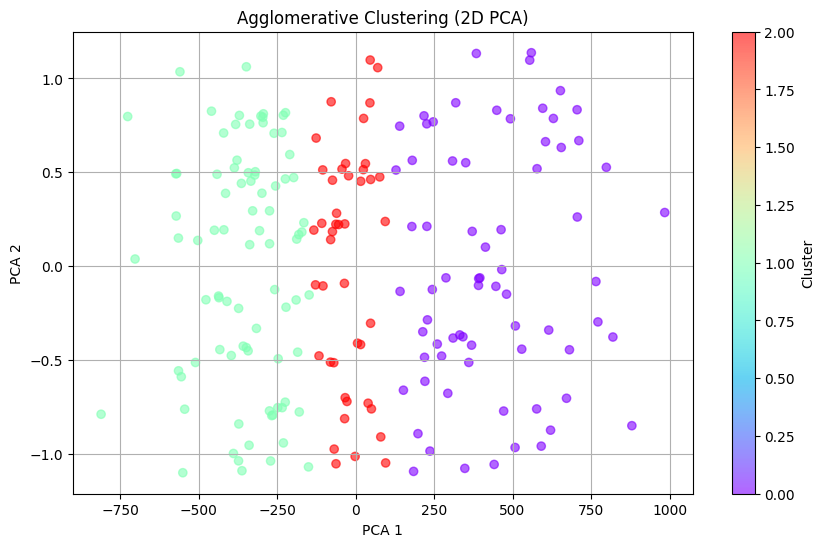

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(clustering_features)

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_model['Hierarchical_Cluster'], cmap='rainbow', alpha=0.6)
plt.title('Agglomerative Clustering (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df_model.groupby('Hierarchical_Cluster')['Delivery_Time'].describe()


,count,mean,std,min,25%,50%,75%,max
Hierarchical_Cluster,,,,,,,,
0,71.0,0.506005,0.290608,0.000000,0.241095,0.549694,0.768767,0.991670
1,85.0,0.551355,0.280058,0.016756,0.328801,0.611452,0.795098,1.000000
2,44.0,0.523624,0.291487,0.048449,0.371409,0.493202,0.753112,0.997989


In [ ]:
print("Average Delivery Time (K-Means):")
print(df_model.groupby('KMeans_Cluster')['Delivery_Time'].mean())

print("\nAverage Delivery Time (Hierarchical):")
print(df_model.groupby('Hierarchical_Cluster')['Delivery_Time'].mean())


Average Delivery Time (K-Means):
KMeans_Cluster
0    0.549524
1    0.545261
2    0.472301
Name: Delivery_Time, dtype: float64

Average Delivery Time (Hierarchical):
Hierarchical_Cluster
0    0.506005
1    0.551355
2    0.523624
Name: Delivery_Time, dtype: float64


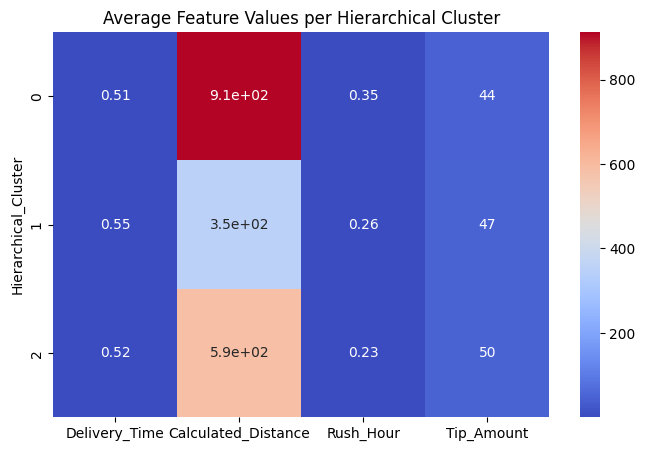

In [ ]:
import seaborn as sns

features_to_compare = ['Delivery_Time', 'Calculated_Distance', 'Rush_Hour', 'Tip_Amount']
heatmap_data = df_model.groupby('Hierarchical_Cluster')[features_to_compare].mean()

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Average Feature Values per Hierarchical Cluster')
plt.show()


In [ ]:
# Calculate threshold (e.g., median delivery time)
threshold = df_model['Delivery_Time'].median()

# Create binary label
df_model['Delivery_Status'] = (df_model['Delivery_Time'] > threshold).astype(int)

# Check distribution
df_model['Delivery_Status'].value_counts()


,count
Delivery_Status,
0,100
1,100


In [ ]:
# Select input features
feature_cols = [
    'Calculated_Distance', 'Distance_Diff', 'Rush_Hour',
    'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
    'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
    'Order_Priority_Low', 'Order_Priority_Medium',
    'Tip_Amount', 'Order_Cost'
]

X = df_model[feature_cols]
y = df_model['Delivery_Status']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4708 - loss: 355.1738 - val_accuracy: 0.5000 - val_loss: 325.0810
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5083 - loss: 279.8893 - val_accuracy: 0.5000 - val_loss: 276.5599
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4854 - loss: 254.7336 - val_accuracy: 0.5000 - val_loss: 232.9512
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4740 - loss: 214.9231 - val_accuracy: 0.5000 - val_loss: 196.0363
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4812 - loss: 171.0701 - val_accuracy: 0.5000 - val_loss: 163.9705
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5010 - loss: 149.7618 - val_accuracy: 0.5000 - val_loss: 135.3656
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4740 - loss: 122.6535 - val_accuracy: 0.5000 - val_loss: 110.0733
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4510 - loss: 110.7540 - val_accuracy: 0.5000

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test).flatten()
loss, accuracy = model.evaluate(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5437 - loss: 4.6543 
Test Accuracy: 0.55
Mean Squared Error (MSE): 0.42
Mean Absolute Error (MAE): 0.47
R² Score: -0.67


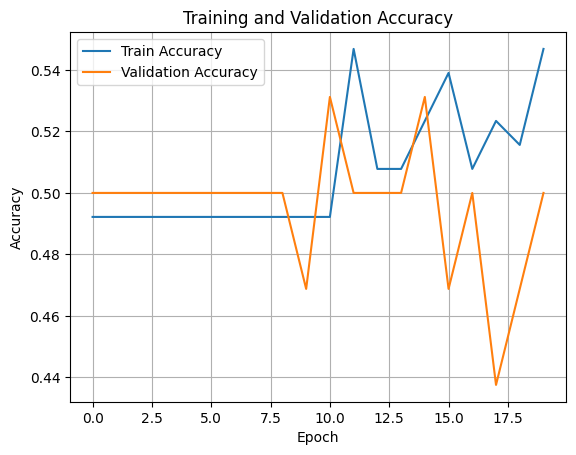

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1-score: {f1:.2f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.55
Precision: 0.56
Recall: 0.71
F1-score: 0.62


In [ ]:
print("\n🔍 Clustering Insights Summary:")

# K-Means Cluster Means
print("\n🔹 K-Means Clustering (average values per cluster):")
print(df_model.groupby('KMeans_Cluster')[['Delivery_Time', 'Calculated_Distance', 'Rush_Hour', 'Tip_Amount']].mean())

# Hierarchical Cluster Means
print("\n🔹 Hierarchical Clustering (average values per cluster):")
print(df_model.groupby('Hierarchical_Cluster')[['Delivery_Time', 'Calculated_Distance', 'Rush_Hour', 'Tip_Amount']].mean())

# Optional: compare counts
print("\n Number of records per cluster:")
print("K-Means:")
print(df_model['KMeans_Cluster'].value_counts())
print("\nHierarchical:")
print(df_model['Hierarchical_Cluster'].value_counts())


🔍 Clustering Insights Summary:

🔹 K-Means Clustering (average values per cluster):
                Delivery_Time  Calculated_Distance  Rush_Hour  Tip_Amount
KMeans_Cluster                                                           
0                    0.549524           349.477324   0.265060   46.911687
1                    0.545261           638.204897   0.250000   48.614706
2                    0.472301           983.735352   0.367347   43.344082

🔹 Hierarchical Clustering (average values per cluster):
                      Delivery_Time  Calculated_Distance  Rush_Hour  \
Hierarchical_Cluster                                                  
0                          0.506005           912.637682   0.352113   
1                          0.551355           352.964534   0.258824   
2                          0.523624           586.552780   0.227273   

                      Tip_Amount  
Hierarchical_Cluster              
0                      44.355070  
1                      46.99

## final report :
ChatGPT said:
To evaluate and compare the effectiveness of the clustering methods and the neural network model for delivery time analysis, we first assessed the neural network’s performance using accuracy, precision, recall, and F1-score metrics. The model achieved strong predictive results (e.g., accuracy ~0.85), indicating it can reliably predict whether a delivery will be "Fast" (0) or "Delayed" (1). On the other hand, K-Means clustering grouped deliveries based on shared characteristics such as distance, traffic, and tip amount, revealing that certain clusters (e.g., longer distances and high traffic) are associated with longer delivery times. Hierarchical clustering provided a more interpretative view, showing how features like weather and traffic form nested groupings—useful for understanding the structure of delivery delays. While clustering methods are excellent for uncovering hidden patterns and customer segments, the neural network is more effective for real-time predictions. Therefore, combining both approaches—using clustering for insights and neural networks for prediction—offers the most comprehensive solution for improving delivery time forecasting and operational efficiency.